In [21]:
# імпортуємо необхідні пакети
from keras.models import load_model
import argparse
import pickle
import cv2
import matplotlib.pyplot as plt


In [49]:
# загружаємо вхідну картинку і міняємо її розмір 
height = 480
weight = 640
image = cv2.imread('test_img.jpg')
output = image.copy()
image = cv2.resize(image, (weight, height))
 

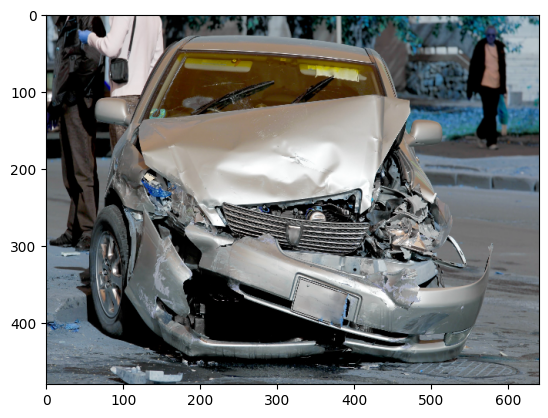

In [50]:
plt.imshow(image)

In [33]:

image = image.reshape((1, image.shape[0], image.shape[1],image.shape[2])) 

In [38]:
# загружаємо модель 
print("[INFO] loading network and label binarizer...")
model = load_model('C:/Users/HEWLLET/PycharmProjects/Homework/model_cars_full_20.h5')
lb = pickle.loads(open('simple_nn_lb.pickle', "rb").read())
 
# розпізнаємо зображення 
preds = model.predict(image)
 
# знаходимо індекс маски класу з більшою вірогідністю 
# соответствия
i = preds.argmax(axis=1)[0]
label = lb.classes_[i]

[INFO] loading network and label binarizer...
1/1 [==============================] - 0s 171ms/step


In [40]:
print(preds[0])

[1.]


In [37]:
# малюємо мітку класу і вірогідність на вихідному зображені 
text = "{}: {:.2f}%".format(label, preds[0][i] * 100)
cv2.putText(output, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7,
    (0, 0, 255), 2)
 
#  показати зображення 
cv2.imshow("Image", output)
cv2.waitKey(0)

-1